## 1) The Normal Distribution
**Q1.** What defines a normal distribution?

**A1.** It is a symmetric, bell-shaped distribution fully described by its **mean (μ)** and **standard deviation (σ)**. The **standard normal** has μ=0 and σ=1.

**Q2.** Generate 1,000 samples from a normal distribution with mean 20 and SD 3, then plot a histogram.

In [2]:
# Run this cell first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import comb, factorial, exp, sqrt
from scipy.stats import norm, binom, poisson, expon, t, t_gen

In [ ]:
rng = np.random.default_rng(2025)
pd.set_option('display.precision', 3)

samples = norm.rvs(20, 3, size=1000)
plt.figure()
plt.hist(samples, bins=30)
plt.title('Normal(μ=20, σ=3) — 1000 samples')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()
float(np.mean(samples)), float(np.std(samples, ddof=0))

**Q3.** About what percentage of values fall within 1 SD of the mean in a normal distribution?

**A3.** Roughly **68%** (the 68–95–99.7 rule).

## 2) The Central Limit Theorem (CLT)
**Q4.** State the CLT in plain English.

**A4.** If you take many random, independent samples and compute a statistic like the **mean**, the distribution of that statistic becomes approximately **normal** as sample size grows—even when the original data are not normal.

**Q5.** Demonstrate the CLT by sampling means from a **uniform** distribution on [0,1]. Compare histograms of sample means for different sample sizes (n=2, n=5, n=30).

In [ ]:
# Sample means from Uniform(0,1)
def sample_means_from_uniform(n, reps=2000):
    means = []
    for _ in range(reps):
        x = rng.uniform(0, 1, size=n)
        means.append(np.mean(x))
    return np.array(means)

means_n2 = sample_means_from_uniform(2)
means_n5 = sample_means_from_uniform(5)
means_n30 = sample_means_from_uniform(30)

plt.figure()
plt.hist(means_n2, bins=30)
plt.title('Sampling distribution of the mean — n=2')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

plt.figure()
plt.hist(means_n5, bins=30)
plt.title('Sampling distribution of the mean — n=5')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

plt.figure()
plt.hist(means_n30, bins=30)
plt.title('Sampling distribution of the mean — n=30')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

float(np.mean(means_n30)), float(np.std(means_n30, ddof=1))

**Q6.** What happens to the **spread** of the sampling distribution of the mean as sample size increases?

**A6.** It **shrinks**. The standard deviation of the sample mean (the **standard error**) decreases roughly like **σ/√n**.

## 3) The Poisson Distribution
**Q7.** When is the Poisson distribution a good model?

**A7.** When you count how many events occur in a fixed time/space interval, assuming events happen at a constant **average rate (λ)** and independently.

**Q8.** If λ=8 adoptions per week, simulate 500 weeks of adoptions and plot a histogram.

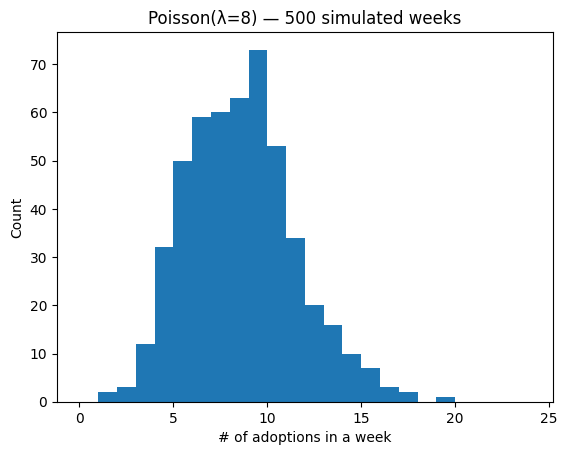

8

In [4]:
adopt = poisson.rvs(8, size=500)
plt.figure()
plt.hist(adopt, bins=np.arange(0, 25))
plt.title('Poisson(λ=8) — 500 simulated weeks')
plt.xlabel('# of adoptions in a week')
plt.ylabel('Count')
plt.show()
int(np.mean(adopt))

**Q9.** Compute P(X=5), P(X≤5), and P(X>5) for X~Poisson(λ=8) **without** SciPy.

In [ ]:
lam = 8
p_eq_5 = poisson.pmf(5, lam)
p_le_5 = poisson.cdf(5, lam)
p_gt_5 = 1 - p_le_5
p_eq_5, p_le_5, p_gt_5

## 4) The Exponential Distribution
**Q10.** How is the exponential distribution related to the Poisson distribution?

**A10.** If events occur according to a Poisson process with rate **λ** per unit time, then the **time between events** is exponential with **mean = 1/λ** (scale parameter).

**Q11.** If tickets arrive on average every 2 minutes, simulate 1,000 wait times and estimate P(wait ≤ 1 min).

In [ ]:
mean_wait = 2.0  # minutes
waits = expon.rvs(mean_wait, size=1000)
p_est = float(np.mean(waits <= 1))
plt.figure()
plt.hist(waits, bins=30)
plt.title('Exponential(mean=2) — 1000 simulated waits')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.show()
p_est

## 5) The t-Distribution
**Q12.** What makes the t-distribution different from the normal distribution?

**A12.** It has **heavier tails** controlled by **degrees of freedom (df)**. For small df, tails are thick; as df grows, it approaches the normal distribution.

**Q13.** Simulate 5,000 draws from a t-like distribution with df=5 and compare its histogram to a standard normal (simulation-based).

In [10]:
t5 = t.rvs(df=5, size=5000)
z = norm.rvs(0, 1, size=5000)
plt.figure()
plt.hist(t5, bins=50)
plt.title('t-like (df=5) — 5000 draws')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

plt.figure()
plt.hist(z, bins=50)
plt.title('Standard Normal — 5000 draws')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()
float(np.mean(t5)), float(np.std(t5, ddof=1)), float(np.mean(z)), float(np.std(z, ddof=1))

NameError: name 't' is not defined

## 6) The Mean of Means
**Q14.** Using a strongly **right-skewed** distribution (log-normal), compute sample means for n=30 over 2,000 repetitions. What do you notice about the shape of the distribution of the means?

In [ ]:
# Simulate a skewed population (log-normal via exponentiating normal)
skewed = np.exp(norm.rvs(0.0, 1.0, size=100000))

def sample_means_from_array(arr, n, reps=2000):
    means = []
    for _ in range(reps):
        idx = rng.integers(0, len(arr), size=n)
        means.append(float(np.mean(arr[idx])))
    return np.array(means)

means_skewed_n30 = sample_means_from_array(skewed, n=30, reps=2000)
plt.figure()
plt.hist(means_skewed_n30, bins=40)
plt.title('Sampling distribution of the mean from a skewed population (n=30)')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()
float(np.mean(means_skewed_n30)), float(np.std(means_skewed_n30, ddof=1))

## 7) Wrap-up
- Normal distribution is defined by **μ** and **σ**; many histograms look roughly normal.
- **CLT**: sampling distributions of means tend to normal as **n** grows.
- **Poisson** counts events; **Exponential** models wait times; **t** handles small-sample uncertainty.
- Simulation is your friend for building intuition.